In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Movie_classification.csv',header=0)

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing Value treatment

In [6]:
df['Time_taken'].mean()

157.39149797570855

In [7]:
df['Time_taken'].fillna(df['Time_taken'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

### Handling Categorical variable by creating dummy variable

we have 2 categorical variables

In [9]:
df.describe(include='O')

,3D_available,Genre
count,506,506
unique,2,4
top,YES,Thriller
freq,279,183


In [11]:
df['Genre'].value_counts()

Thriller    183
Comedy      155
Drama        97
Action       71
Name: Genre, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [13]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


### X-y split

In [14]:
X=df.loc[:,df.columns!='Start_Tech_Oscar']
y=df['Start_Tech_Oscar']

In [15]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

### Train-Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train.shape

(404, 20)

In [20]:
X_test.shape

(102, 20)

### Training Regression Tree

In [21]:
from sklearn import tree

In [22]:
classtree=tree.DecisionTreeClassifier(max_depth=3)

In [23]:
classtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Predict values using trained model

In [25]:
y_train_pred=classtree.predict(X_train)
y_test_pred=classtree.predict(X_test)

### Model Performance

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

    predicted(0)  (1)
actual(0)

actual(1)

In [28]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [31]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

In [33]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [34]:
accuracy_score(y_train,y_train_pred) 

0.6534653465346535

### Plotting Decision Tree


In [35]:
from IPython.display import Image
import pydotplus

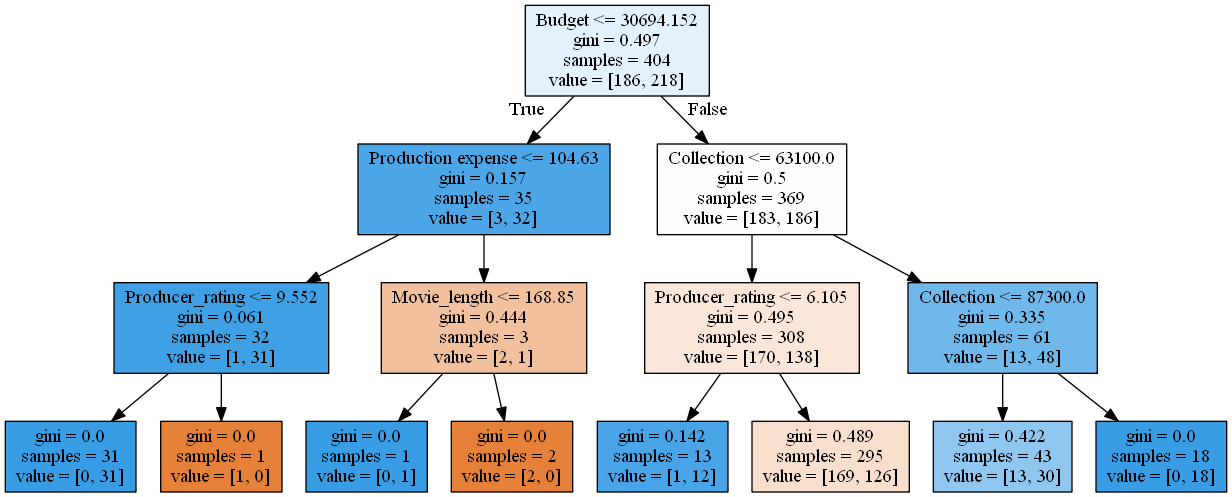

In [36]:
dot_data=tree.export_graphviz(classtree,out_file=None,feature_names=X_train.columns, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Controlling Tree Growth : Pruning

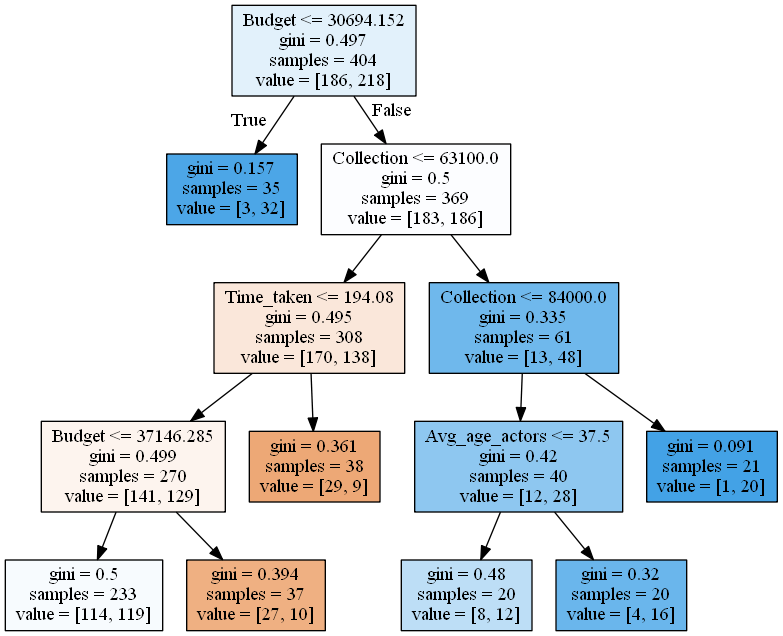

In [41]:
classtree2=tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
classtree2.fit(X_train,y_train)
dot_data=tree.export_graphviz(classtree2,out_file=None,feature_names=X_train.columns, filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [42]:
accuracy_score(y_test,classtree2.predict(X_test))

0.5588235294117647

In [43]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373